# Dragon Real Estate - Price predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
house=pd.read_csv("Housing.csv")

In [3]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


## CHECKING NULL VALUES IN DATASET

In [5]:
house.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
house['CRIM'].value_counts()

CRIM
14.33370    2
0.01501     2
0.00632     1
0.02498     1
0.03041     1
           ..
2.92400     1
2.24236     1
1.51902     1
1.83377     1
0.65432     1
Name: count, Length: 509, dtype: int64

In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

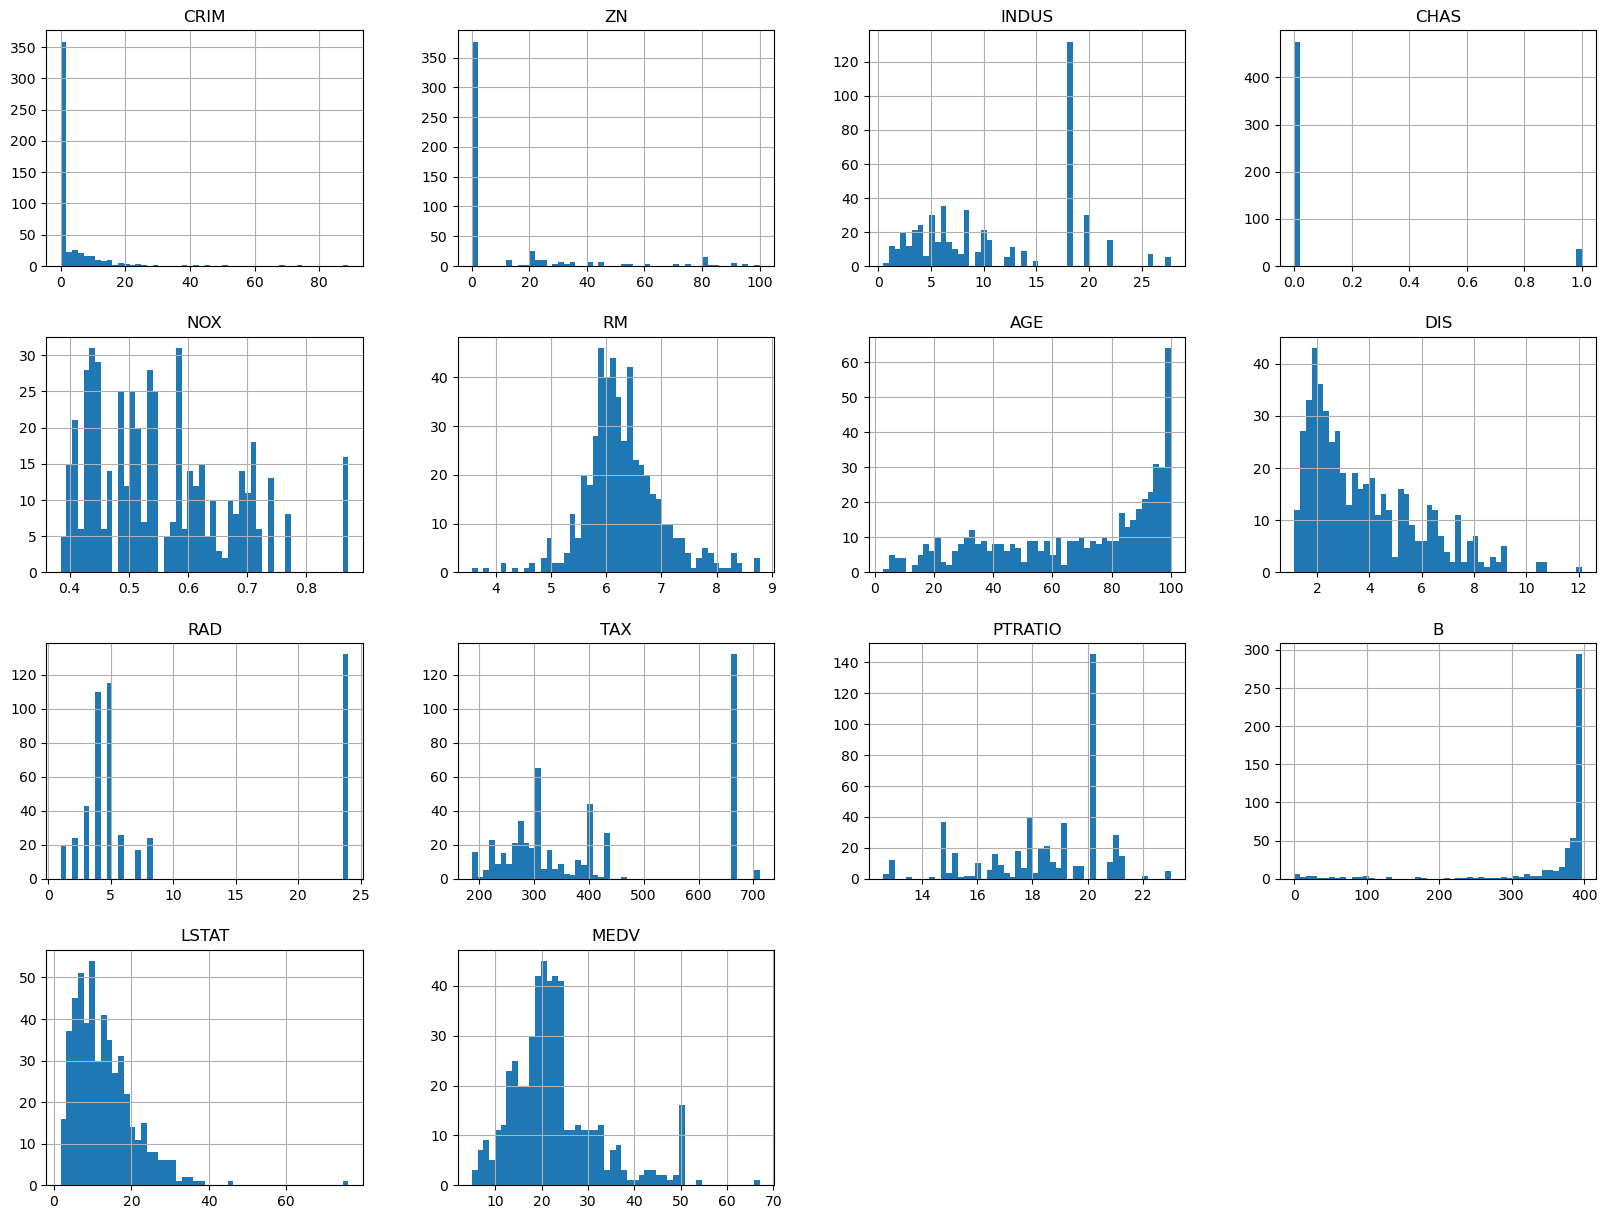

In [10]:
#A histogram is a graph showing frequency distributions.
house.hist(bins=50, figsize=(20,15))

## TRAIN-TEST SPLITTING

In [11]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffle_data=np.random.permutation(len(data))
    test_data_size=int(len(data) * test_ratio)
    test_data_indices=shuffle_data[:test_data_size]
    train_data_indices=shuffle_data[test_data_size:]
    return data.iloc[train_data_indices], data.iloc[test_data_indices]

In [12]:
train_set, test_set= split_train_test(house, 0.2)

In [13]:
print("Rows in train set is:",len(train_set)," and in test_set",len(test_set))

Rows in train set is: 409  and in test_set 102


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(house, test_size=0.2, random_state=42)
print("Rows in train set is:",len(train_set),"\nand in test_set",len(test_set))

Rows in train set is: 408 
and in test_set 103


## STRATIFIED SAMPLING:
It helps train and test set to represent whole data 

In [15]:
# TO FILL NaN values in dataset
house['CHAS'].fillna(method = 'ffill', inplace = True)

C:\Users\Ali Ahmed\AppData\Local\Temp\ipykernel_16636\4004599575.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house['CHAS'].fillna(method = 'ffill', inplace = True)


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
Split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in Split.split(house, house['CHAS']):
    strat_train=house.loc[train_index]
    strat_test=house.loc[test_index]

In [18]:
strat_train['CHAS'].value_counts()

CHAS
0    380
1     28
Name: count, dtype: int64

In [19]:
strat_test['CHAS'].value_counts()

CHAS
0    96
1     7
Name: count, dtype: int64

## give equal ratio for both data set 

In [20]:
95/7

13.571428571428571

In [21]:
377/27

13.962962962962964

## In order to create “real copies” or “clones” of these objects, we can use the copy module in Python.

In [22]:
house=strat_train.copy()

## Looking for correlations 
Correlation is a statistical technique that shows how two variables are related.
In statistics, correlation is a measure of the linear relationship between two variables.

The value for a correlation coefficient is always between -1 and 1 where:

-) -1 indicates a perfectly negative linear correlation between two variables
-)  0 indicates no linear correlation between two variables
-)  1 indicates a perfectly positive linear correlation between two variables

In [23]:
corr_matrix=house.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

## Plot correlation through pandas 
Checking for collinearity among attributes of a dataset, is one of the most important steps in data preprocessing. A good way to understand the correlation among the features, is to create scatter plots for each pair of attributes.

Scatter plot helps to remove outliers 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

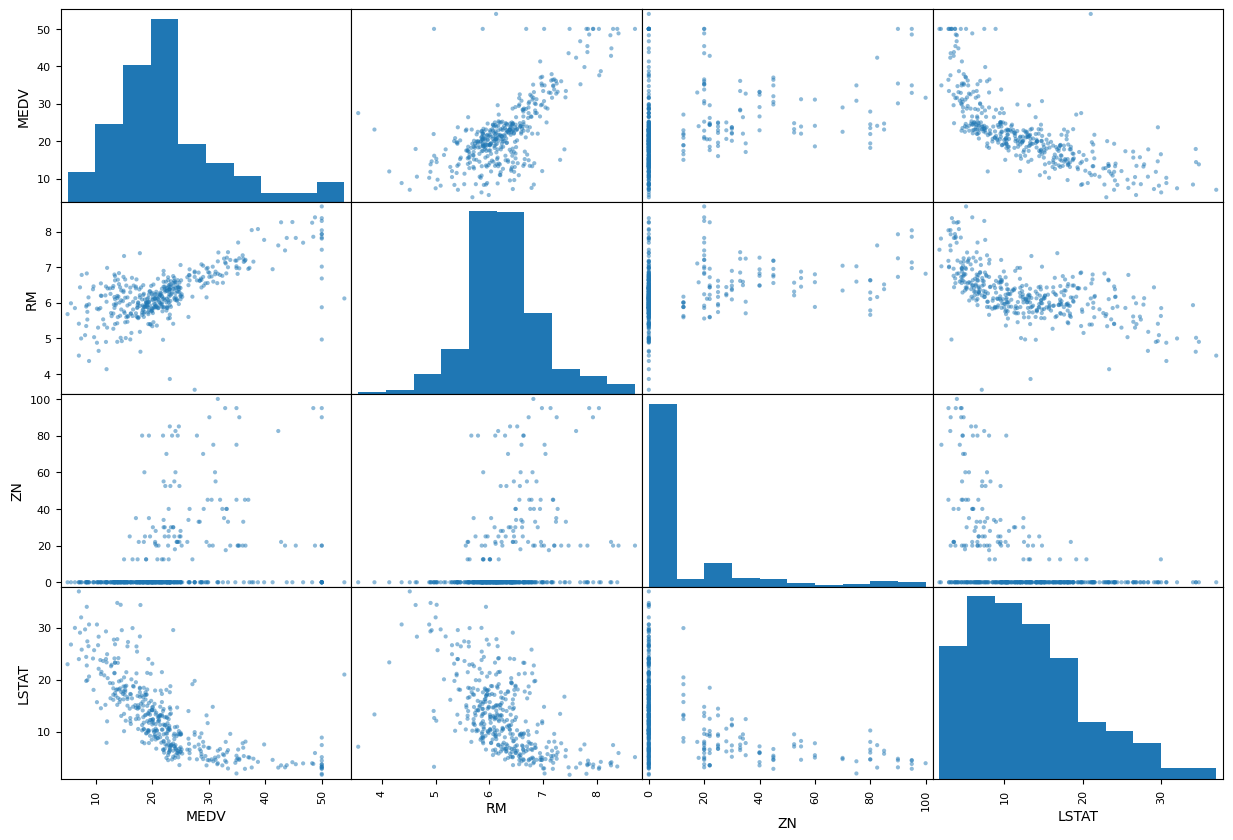

In [24]:
from pandas.plotting import scatter_matrix
attributes=['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(house[attributes], figsize=(15,10))

<Axes: xlabel='RM', ylabel='MEDV'>

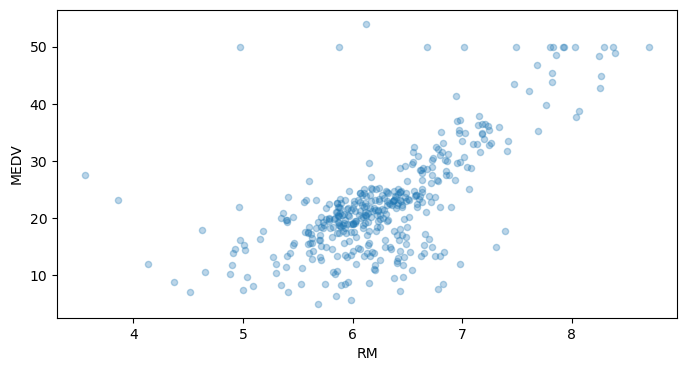

In [25]:
house.plot(kind="scatter", x="RM", y="MEDV", alpha=0.3, figsize=(8,4))

## Trying different attributes correlation

In [26]:
# new feature for tax and RM
#house["TAXRM"]=house["TAX"]/house["RM"]

In [27]:
#house["AGERM"]=house["AGE"]/house["RM"]

In [28]:
#house.plot(kind="scatter", x="MEDV", y="AGERM", alpha=0.3)

In [29]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9


## Seperating features and labels from strat_train data

In [30]:
house=strat_train.drop('MEDV', axis=1)
house_labels= strat_train['MEDV'].copy()

## Handling for missing Attributes
there are 3 options:

1; remove that attributes by using (house.drop("NOX")) it will remove NOX featute from data;
    
2; remove missing values {NaN} by using (house.dropna(subset=["NOX]) it wil remove missing values from feature;
    
3; fill that missing value attribute by computing mean or median like this:
              median=house["NOX"].median()
               house["NOX"].fillna(median, inplace="True")

## Another method for handling missing attributes from sklearn 

In [31]:
# Imputation estimator for completing missing values, using the mean, median or mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # strategy is hyperparameter
#imputer.fit(house)
x=imputer.fit_transform(house)

In [32]:
#imputer.statistics_

In [33]:
# transform() function in Pandas is that they are extremely adaptable to merging. 
#Once we create a dataframe, we will merge the indices and finally generate the output.
#x=imputer.transform(house)
house_tra=pd.DataFrame(x, columns=house.columns)


In [34]:
house_tra.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716458,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


In [35]:
house_tra['CRIM'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.17899
1       0.04819
2       4.55587
3       0.02187
4       0.06417
         ...   
403    24.39380
404     0.12757
405     1.23247
406     5.82401
407     4.75237
Name: CRIM, Length: 408, dtype: float64>

# Scikit Learn Design

Primarily 3 types of objects:
1. Estimators--> It estimate or evaluate the parameters/instructions based on dataset. An estimator is an object that fits a model based on the input data. e.g;Imputer is a missing value estimator. It has fit method (It fit dataset and calcalute parameter. The ‘fit’ method trains the algorithm on the training data, after the model is initialized.) and Transform method(takes input and return output based on learning from fit() method. )


2. Tranformers--> Scikit-learn provides a library of transformers, which may clean (see Preprocessing data ), reduce (see Unsupervised dimensionality reduction ), expand (see Kernel Approximation) or generate (see Feature extraction ) feature representations.)


3. Predictors--> To predict new data instances(LinearRegression is an example of it. It has two common functions fit and predict functions)

# Feature scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
primarily two types of method:
1.Min-Max Scaling(normalization)
(value-min)/(max-min)
Sklearn provide a class for this called MinMaxScaler

2.Standardization
(value-mean)/std
Sklearn provide a class for this called Standard Scaler

# Creating Pipeline
Pipelines function by allowing a linear series of data transforms to be linked together, resulting in a measurable modeling proces

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mypipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # .... add as many you want in pipeline  
    ('std_scalar', StandardScaler())
])

In [37]:
house_tra_num=mypipeline.fit_transform(house)

In [38]:
house_tra_num.shape

(408, 13)

# Selecting a Desire Model for Dragon Real Estate

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
#model=LinearRegression()
#model= DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(house_tra_num, house_labels)

RandomForestRegressor()

### Model Prediction

In [41]:
some_data=house.iloc[:5]

In [42]:
some_labels=house_labels[:5]

In [43]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68


In [44]:
prepare_data=mypipeline.transform(some_data)

In [45]:
prepare_data.shape

(5, 13)

In [46]:
model.predict(prepare_data)

array([21.617, 22.335, 25.456, 30.23 , 20.119])

In [47]:
list(prepare_data)

[array([-0.42152521, -0.48685178, -0.24673925, -0.27144836,  0.2311586 ,
        -0.85631303, -1.42946756, -0.4510327 , -0.42117544, -0.12039257,
         0.3268577 ,  0.41580739,  0.64788652]),
 array([-0.43776099,  3.14285176, -1.1325159 , -0.27144836, -1.43355877,
        -0.22938622, -1.31615648,  2.63129804, -0.9955056 , -0.57272902,
        -0.98103103,  0.41161669, -0.87937274]),
 array([ 0.12176277, -0.48685178,  0.9845635 , -0.27144836,  1.37834725,
        -3.87500851,  0.66324649, -1.02000896,  1.6464131 ,  1.51635118,
         0.79396081,  0.01150978, -0.80321747]),
 array([-0.441028  ,  2.23542587, -1.23646655, -0.27144836, -1.35592946,
         0.76110087, -2.09871114,  1.19100188, -0.9955056 , -0.87031879,
        -1.35471352,  0.41664553, -1.09260748]),
 array([-0.43577744, -0.48685178, -0.79284618, -0.27144836, -0.51063256,
        -0.08625225, -0.03432486, -0.18142416, -0.53604147, -0.78699366,
         0.3268577 ,  0.45362844, -0.44874932])]

In [48]:
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

sklearn.metrics Assess the quality of your predictions

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
house_predictions=model.predict(house_tra_num)
linear_mse=mean_squared_error(house_labels, house_predictions)
rmse=np.sqrt(linear_mse)

In [51]:
rmse

1.4941378973751205

## Using better evaluation technique- Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, house_tra_num, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([3.0156727 , 3.95652734, 4.78965837, 4.08222363, 3.00375459,
       2.30497579, 6.9512471 , 2.89076137, 3.27099817, 3.59033198])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Scores mean:", scores.mean())
    print("Scores Standard deviation:", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [3.0156727  3.95652734 4.78965837 4.08222363 3.00375459 2.30497579
 6.9512471  2.89076137 3.27099817 3.59033198]
Scores mean: 3.7856151036807972
Scores Standard deviation: 1.250865925782546


## Saving Model

In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model 

In [56]:
X_test=strat_test.drop('MEDV', axis=1)
Y_target=strat_test['MEDV'].copy()
X_test_set_prepare=mypipeline.transform(X_test)
final_predictions=model.predict(X_test_set_prepare)
final_mse=mean_squared_error(Y_target, final_predictions)
final_rmse=np.sqrt(final_mse)

In [57]:
print(final_predictions,"\n", list(Y_target))

[21.751 26.76  23.487 25.664 33.027 23.527 22.115 20.704 22.07  20.668
 10.943 22.15  26.788 19.663 15.043 19.065 18.742 19.604 18.433 32.052
 26.122 18.308 31.578 15.565 24.778 18.648 14.472 31.783 19.723 19.943
 26.738 18.912 44.647 28.857 21.368 40.335 33.467 22.531 25.801 21.718
 20.001 13.758 22.443 29.431 24.08  11.427  9.044 33.73  42.677 20.813
 23.838 37.164 14.655 24.965 19.426 28.724 18.774 19.232 23.61  20.131
 20.721 33.062 11.176 20.948 22.495 21.689 15.103 20.986 19.739 19.148
 31.795 21.354 30.684 20.112 47.511 15.293 19.793 36.469 43.657 17.706
 24.248 10.171 44.309 20.585 25.574 16.    35.631 11.818 32.125 20.832
 18.474 42.893 20.906 14.08   6.761 12.334 33.246 29.846 34.338 22.039
 17.465 33.451 19.115] 
 [22.4, 25.0, 22.2, 24.4, 31.5, 23.3, 25.0, 24.5, 22.0, 20.3, 12.3, 21.2, 28.0, 23.8, 14.6, 20.8, 17.2, 19.5, 14.4, 28.5, 30.1, 19.6, 23.6, 19.4, 24.7, 19.9, 13.5, 30.3, 21.8, 20.4, 27.9, 18.9, 46.0, 23.9, 21.7, 44.0, 33.2, 21.6, 27.0, 19.8, 20.9, 16.7, 22.2, 24.8, 

In [58]:
print("Final rmse is:", final_rmse)

Final rmse is: 4.804250847310485


In [60]:
X_test_set_prepare[23]

array([-0.17697189, -0.48685178,  1.20124936, -0.27144836,  2.69804547,
       -0.80049078,  1.03858946, -1.01520909, -0.53604147, -0.04897102,
       -1.77510633, -0.96020836,  0.39726646])